<a href="https://colab.research.google.com/github/SiddamVamsi264/Cricket-Match-Analysis/blob/main/India_vs_USA_T20_World_Cup_Match_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

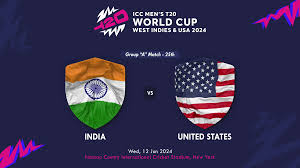

In [ ]:
from itertools import groupby
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
data = pd.read_csv("/content/india-usa_innings_data.csv")
print(data.head())

            batter          bowler non_striker  runs_batter  runs_extras  \
0  Shayan Jahangir  Arshdeep Singh   SR Taylor            0            0   
1         AGS Gous  Arshdeep Singh   SR Taylor            0            0   
2         AGS Gous  Arshdeep Singh   SR Taylor            0            0   
3         AGS Gous  Arshdeep Singh   SR Taylor            0            1   
4         AGS Gous  Arshdeep Singh   SR Taylor            2            0   

   runs_total wickets_0_player_out wickets_0_kind                      team  \
0           0      Shayan Jahangir            lbw  United States of America   
1           0                  NaN            NaN  United States of America   
2           0                  NaN            NaN  United States of America   
3           1                  NaN            NaN  United States of America   
4           2                  NaN            NaN  United States of America   

   over  ...  wickets_0_fielders_0_name review_by review_umpire revi

Let’s have a look at the missing values and data types:

In [ ]:
# checking for missing values in the dataset
missing_values = data.isnull().sum()

# checking data types of the columns
data_types = data.dtypes

missing_values

,0
batter,0
bowler,0
non_striker,0
runs_batter,0
runs_extras,0
runs_total,0
wickets_0_player_out,225
wickets_0_kind,225
team,0
over,0


In [ ]:
data_types

,0
batter,object
bowler,object
non_striker,object
runs_batter,int64
runs_extras,int64
runs_total,int64
wickets_0_player_out,object
wickets_0_kind,object
team,object
over,int64


The data has null values in various columns.  

But in such datasets, even null values have a meaning, so we will leave them as it is and move forward.  

Let’s group the data for analysis:  

We have grouped the data to calculate:  

**Batter Statistics:**  

- Total runs scored by each batter.  
- Total balls faced by each batter.  
- Strike rate for each batter.  
- Number of 4s and 6s hit by each batter.  

**Bowler Statistics:**  

- Total wickets taken by each bowler.  
- Total runs conceded by each bowler.  
- Total balls bowled by each bowler.  
- Economy rate for each bowler.  
- Total dot balls bowled by each bowler.

In [ ]:
# Runs scored by batter
runs_scored = data.groupby('batter')[['runs_batter']].sum()['runs_batter']

#balls faced by each batter
balls_faced = data.groupby('batter').size()

# Strike Rate
strike_rate = (runs_scored / balls_faced)*100

#boundaries hit by each batter
boundaries = data[(data['runs_batter'] == 4) | (data['runs_batter'] == 6)].groupby(['batter','runs_batter']).size().unstack(fill_value=0)

#wickets taken by each bowler
wickets_taken = data['wickets_0_player_out'].notna().groupby(data['bowler']).sum()

#runs_conceeded
runs_conceeded = data.groupby('bowler')['runs_total'].sum()

#Balls bowled by each bowler
balls_bowled = data.groupby('bowler').size()

#economy rate
economy_rate = (runs_conceeded / (balls_bowled/6))

#dots balls bowled by each bowler
dot_balls = data[data['runs_total']== 0].groupby('bowler').size()

#combining all these into the batter and bowler stats differenlt
batter_stats = pd.DataFrame({'Runs_made':runs_scored,"Balls Faced":balls_faced,"Strike Rate":strike_rate}).join(boundaries, how='left').fillna(0).astype(int)

bowler_stats = pd.DataFrame({"Wickets":wickets_taken,"Runs_Conceded":runs_conceeded,"Balls Bowled":balls_bowled,"Economy Rate":economy_rate,"Dot Balls":dot_balls})

print("Batter Stats:\n", batter_stats)
print("\nBowler Stats:\n", bowler_stats)


Batter Stats:
                   Runs_made  Balls Faced  Strike Rate  4  6
batter                                                     
AGS Gous                  2            6           33  0  0
Aaron Jones              11           22           50  0  1
CJ Anderson              15           12          125  1  1
Harmeet Singh            10           10          100  0  1
Jasdeep Singh             2            7           28  0  0
NR Kumar                 27           24          112  2  1
RG Sharma                 3            6           50  0  0
RR Pant                  18           20           90  1  1
S Dube                   31           37           83  1  1
SA Yadav                 50           49          102  2  2
SC van Schalkwyk         11           10          110  1  0
SR Taylor                24           31           77  0  2
Shayan Jahangir           0            1            0  0  0
V Kohli                   0            1            0  0  0

Bowler Stats:
          

Now Let's Analyse our data using various visualizations. Now, let’s have a look at the progression of the run over overs:

In [ ]:
#Visualization
#Innings Runs Progression
india_runs_progression = data[data['team'] == 'India'].groupby('over')['runs_total'].sum().cumsum()
usa_runs_progression = data[data['team'] == 'United States of America'].groupby('over')['runs_total'].sum().cumsum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=india_runs_progression.index, y=india_runs_progression.values,mode='lines+markers',name='Indian Runs'))
fig.add_trace(go.Scatter(x=usa_runs_progression.index,y = usa_runs_progression.values,mode='lines+markers',name='United States Runs'))
fig.update_layout(title='Runs Progression Over wise',xaxis_title='overs',yaxis_title='Runs Progression',legend_title='Teams',template='plotly_white')
fig.show()


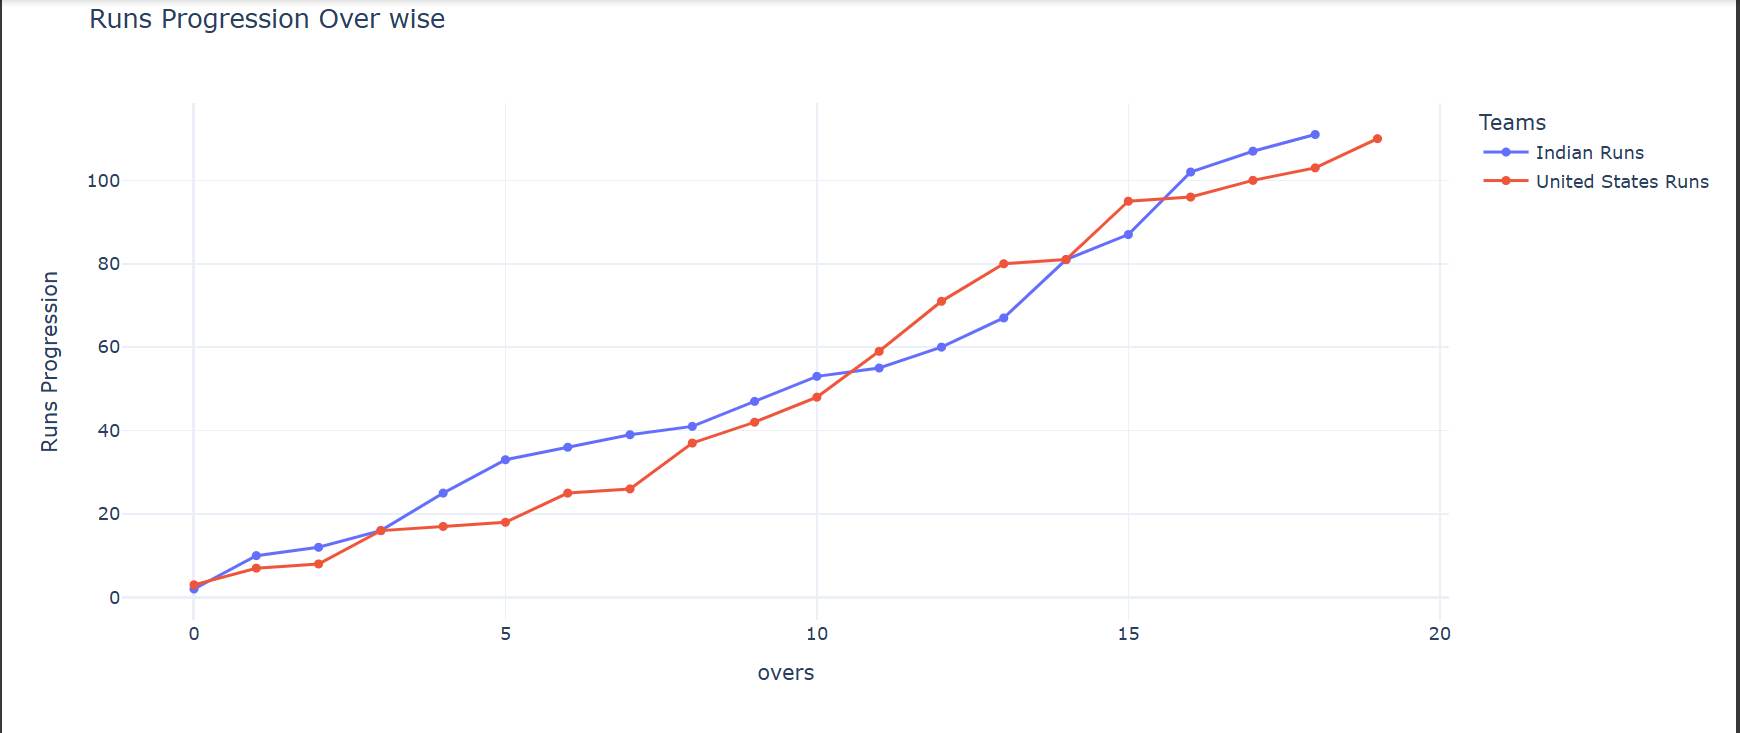

The graph tracks the cumulative runs scored by India and the USA throughout their T20 World Cup match. In the initial overs, both teams maintained a similar scoring rate, with India holding a slight advantage. During the middle overs, the USA accelerated their scoring, briefly overtaking India's total. However, India rallied in the final overs, significantly increasing their run rate to surpass the USA and secure victory. The key highlight is India's strong finish, demonstrating their ability to accelerate the scoring in the crucial final phase of the innings.

Now, let’s have a look at the wickets timeline:

In [ ]:
#Fall of Wickets
india_wickets = data[(data['team'] == 'India')&data['wickets_0_player_out'].notna()].groupby('over').size()
usa_wickets = data[(data['team']=='United States of America') & data['wickets_0_player_out'].notna()].groupby('over').size()

fig = go.Figure()

fig.add_trace(go.Bar(x=india_wickets.index,y=india_wickets.values,name='Indian Wickets',marker_color='blue',opacity=0.8))
fig.add_trace(go.Bar(x=usa_wickets.index,y=usa_wickets.values,name='United States Wickets',marker_color='red',opacity=0.8))
fig.update_layout(title="Wickets Timeline",xaxis_title='overs',yaxis_title='Wickets',template='plotly_white',legend_title='Teams')
fig.show()

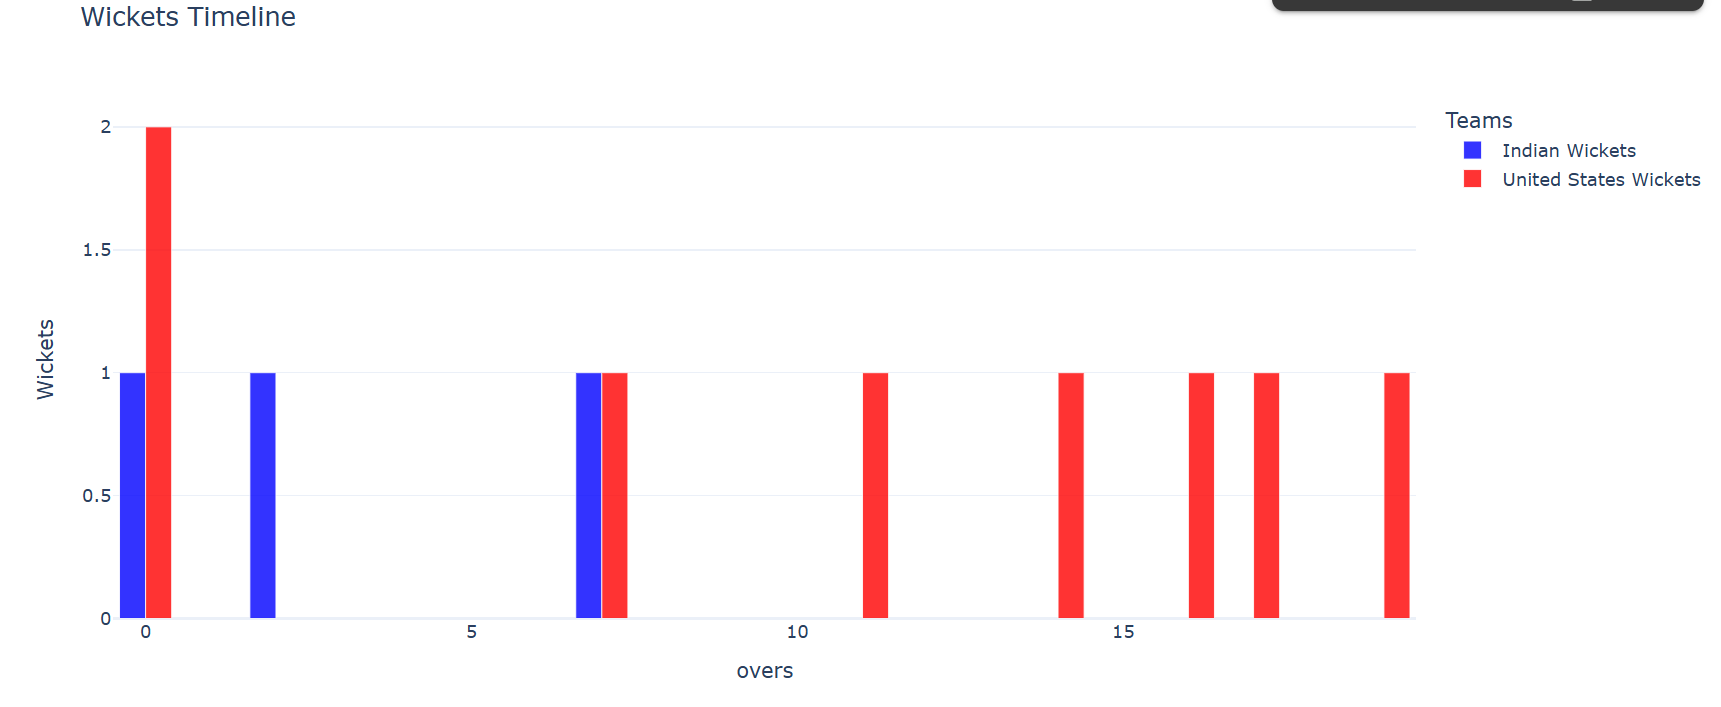

The wickets timeline graph visualizes the fall of wickets across the overs for both India and the USA. The USA's innings was marked by a higher frequency of wickets lost, particularly during the powerplay, with two early dismissals in the first over setting the tone. They continued to lose wickets at regular intervals throughout their innings. Conversely, India's wickets were more evenly distributed, with a couple of early setbacks but crucial partnerships formed in the middle overs. The USA's inability to build substantial partnerships due to consistent wicket losses hampered their scoring, while India's resilience in preserving wickets allowed them to maintain a more consistent scoring rate and ultimately prevail.

Now, let’s have a look at the run distribution by batters:

In [ ]:
#Batsmen Runs
fig=px.bar(batter_stats,x=batter_stats.index,y='Runs_made',title="Batsmen Runs",labels={'x':'Batter','Runs':'Runs Scored'},template='plotly_white')
fig.update_layout(xaxis_title='Batter',yaxis_title='Runs Scored',xaxis=dict(tickangle=90),template='plotly_white')
fig.show()

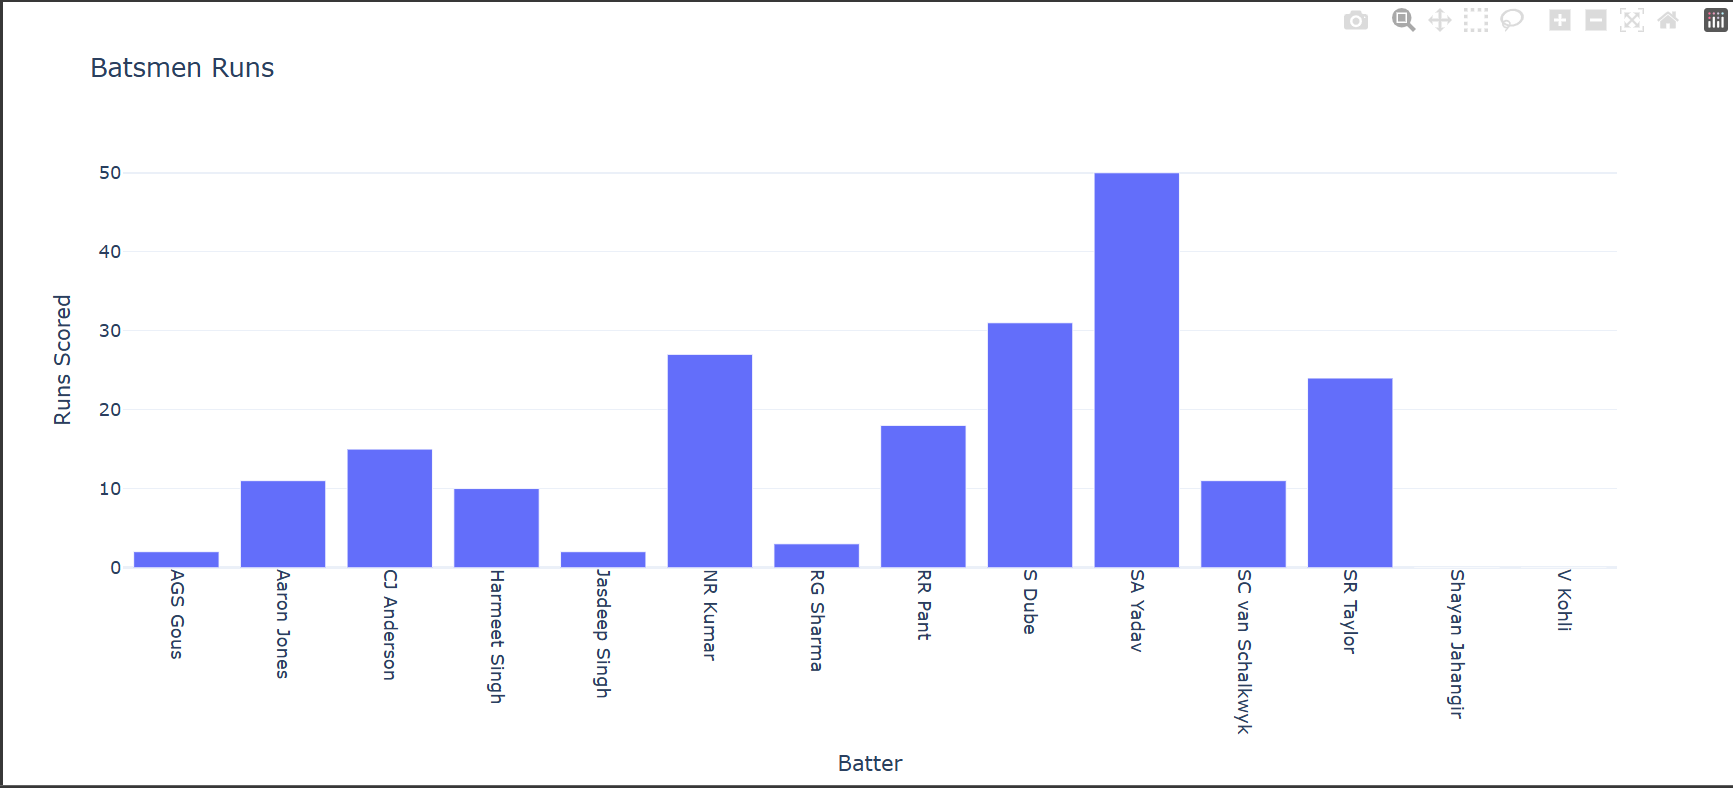

Notably, S. A. Yadav emerged as the highest scorer with a significant contribution, followed by NR Kumar and S. Dube. These three players were pivotal in their team’s innings, providing the bulk of the runs.

Now, let’s have a look at the key moments for the USA in the innings which resulted in a low target:

In [ ]:
#Key Moments in USA Innings

#Commulative runs of both team per each over

india_commulative_runs=data[data['team']=='India'].groupby('over')['runs_total'].sum().cumsum()
usa_commulative_runs=data[data['team']=='United States of America'].groupby('over')['runs_total'].sum().cumsum()
#print(india_commulative_runs,usa_commulative_runs)

#extract key Moments in the match
india_key_moments = data[(data['team']=='India')& data['wickets_0_player_out'].notna()].reset_index()
usa_key_moments = data[(data['team']=='United States of America') & data['wickets_0_player_out'].notna()]
# print(india_key_moments)
# print(usa_key_moments)

#Boundaries
india_boundaries=data[(data['team']=='India') & (data['runs_total'] >= 4)]
usa_boundaries = data[(data['team']=='United States of America') & (data['runs_total'] >= 4)]
# print(india_boundaries)
# print(usa_boundaries)
#USA Plots
fig = go.Figure()
fig.add_trace(go.Scatter(x=usa_commulative_runs.index,y=usa_commulative_runs.values,mode='lines+markers',name='United States Commulative Runs',line=dict(color='blue')))

fig.add_trace(go.Scatter(x=usa_wickets.index,y=usa_commulative_runs.loc[usa_wickets.index],mode='markers',name='United States Wickets',marker=dict(color='red',size=10)))

for _,row in usa_key_moments.iterrows():
    fig.add_annotation(x=row['over'],y=usa_commulative_runs.loc[row['over']],text=f"{row['batter']} ({row['over']}",showarrow=True,font=dict(size=14),arrowhead=2,ax=row['over'],ay=usa_commulative_runs.loc[row['over']]+5,arrowcolor='black')
    fig.update_layout(title='USA Key Moments in Innings',xaxis_title='Overs',yaxis_title="Runs",legend_title='USA Innings',template='plotly_white',autosize=False,width=900,height=600)
fig.show()


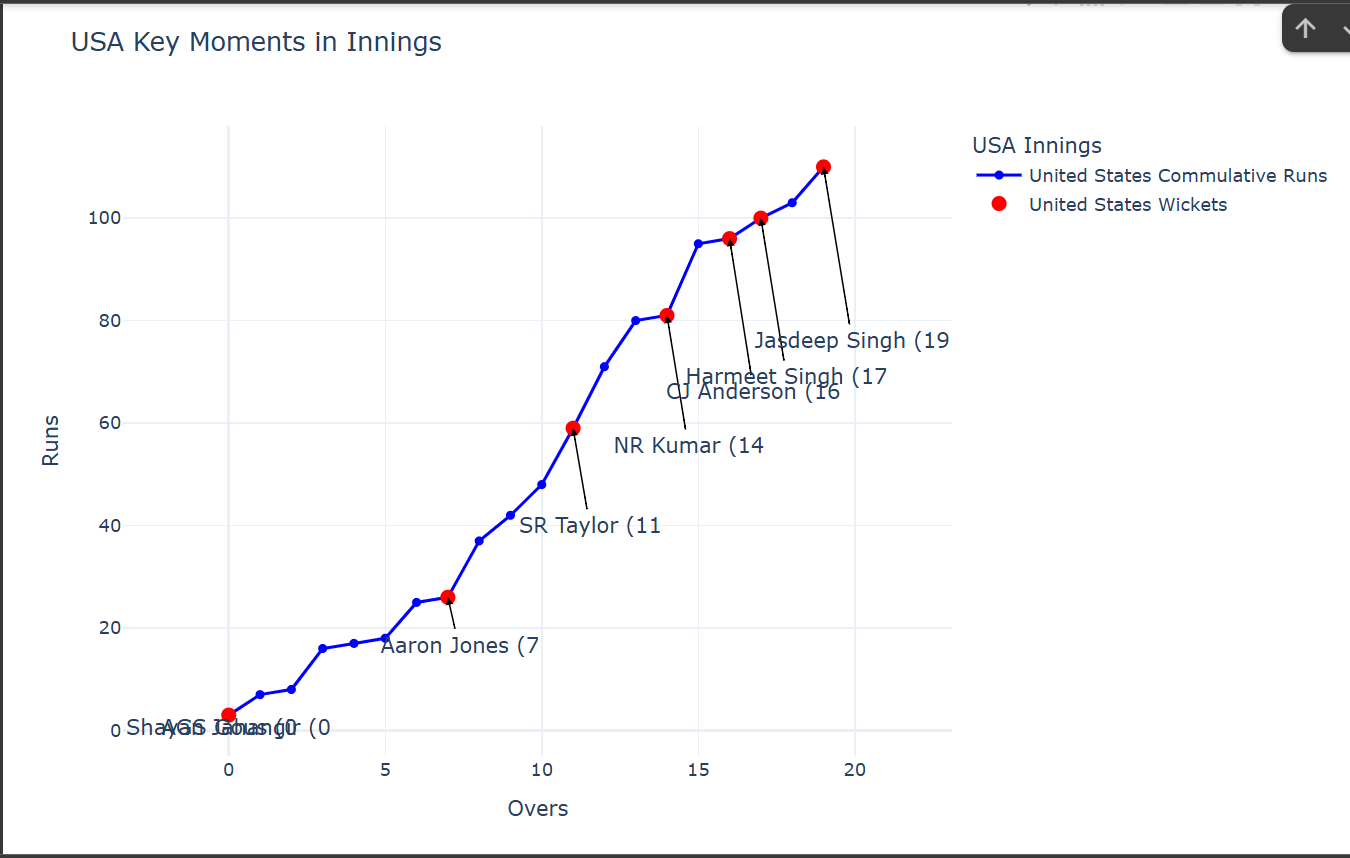

This graph displays the USA's innings, showing their total runs building up over time, with markers indicating when wickets fell. Early dismissals, including Shayan Jahangir and AGS Gous in the first over, put the USA under pressure right away. Although they had some good periods, like the partnerships between SR Taylor and NR Kumar, they kept losing wickets throughout the middle and late overs, especially between the 14th and 19th overs. The loss of important batsmen like Aaron Jones, SR Taylor, Harmeet Singh, and CJ Anderson stopped them from building big partnerships and scoring runs consistently, which ultimately affected their final score.

Now, let’s have a look at the key moments for India:

In [ ]:
#India Plots
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_commulative_runs.index,y=india_commulative_runs.values,mode='lines+markers',name='Indian Commulative Runs',line=dict(color='green')))
fig.add_trace(go.Scatter(x=india_wickets.index,y=india_commulative_runs.loc[india_wickets.index],mode='markers',name='Indian Wickets',marker=dict(color='red',size=10)))
for _, row in india_key_moments.iterrows():
    fig.add_annotation(
        x=row['over'],
        y=india_commulative_runs.loc[row['over']],
        text=f"{row['batter']} ({row['over']})",
        showarrow=True,
        font=dict(size=14),
        arrowhead=2,
        ax=row['over'],
        ay=india_commulative_runs.loc[row['over']] + 5,
        arrowcolor='black'
    )
    fig.update_layout(title='India Key Moments',xaxis_title='Overs',yaxis_title='Runs Scored',template='plotly_white',autosize=False,width=900,height=600)
fig.show()

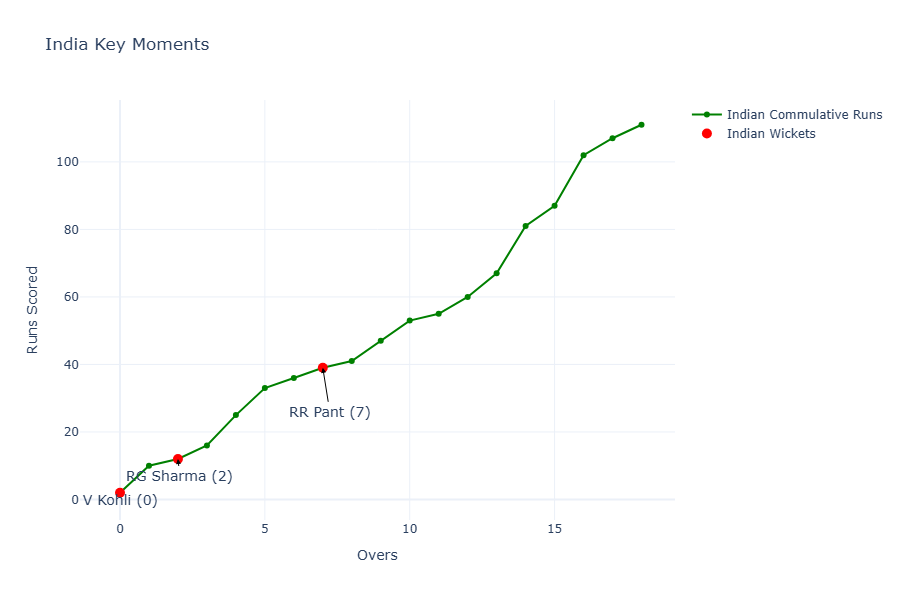

Despite an early wobble with the loss of V. Kohli and RG Sharma in the opening two overs, India managed to keep the scoreboard ticking over at a reasonable rate. The dismissal of RR Pant in the 7th over was another key moment, but crucial partnerships that followed helped to steady the ship.

Now, let’s compare the average run rate for both teams:

In [ ]:
#Run Rate Comparison
india_run_rate=data[data['team']=='India'].groupby('over')['runs_total'].sum().mean()
usa_run_rate=data[data['team']=='United States of America'].groupby('over')['runs_total'].sum().mean()

fig = go.Figure()

fig.add_trace(go.Bar(x=['India','USA'],y=[india_run_rate,usa_run_rate],marker_color=['green','blue']))
fig.add_annotation(
    x='India',
    y=india_run_rate,
    text=f"{india_run_rate:.2f}",
    showarrow=False,
    yshift=10,

)

fig.add_annotation(
    x='USA',
    y=usa_run_rate,
    text=f"{usa_run_rate:.2f}",
    showarrow=False,
    yshift=10,
)
fig.update_layout(
    title='Runrate Comparison',
    xaxis_title='Team',
    yaxis_title='Run Rate Per Over',
    template='plotly_white'
)
fig.show()

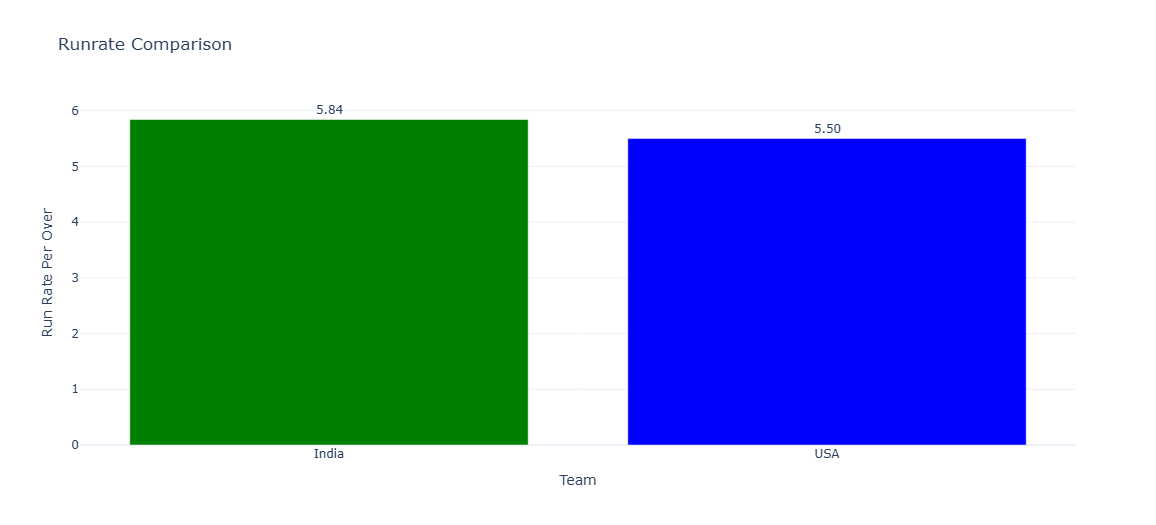

A comparison of the average run rate per over reveals that India maintained a higher rate of 5.84, compared to the USA's 5.50. This demonstrates India's superior scoring efficiency throughout their innings. India's ability to sustain a consistent scoring rate, even after losing early wickets, was instrumental in reaching their target. Conversely, the USA's slightly lower run rate indicates they found it challenging to increase their scoring pace, particularly during the middle overs, ultimately affecting their final total.

**Summary**  

In conclusion, India’s strategy of consistent scoring, effective partnerships, and a balanced bowling attack proved successful against the USA’s inconsistent batting performance and less impactful bowling.